# pycon 2018 reproducability research workthrough

######NOTES
reproducabile: give someone my code and data and can get same results
replicable: give someone my code and with their data can get similar results
robust: using data and similar but different packages (python/r/sas) can get same results
parlance: knowing versioning and packages for every data generated.





tools: figshare, institutional database, webpage (sharing figures)

code has a copyright, and without a liscence others dont know if they can use it or not. ALWAYS ADD A LISCENCE

types:

permissive liscence: authors need to be credited
copyleft: restrict use of software by req that any derivative works be also under liscence of the origional.

http://chosealicense.com/  #great starting point


## project structure
integrity of data

portability of the project

easier to pick up the project back after break

#example project structure
.
├── LICENSE
├── README.md
├── bin                 <- Compiled codes or binaries*
├── config              <- Configuration files*
├── data
│   ├── external        <- Data from third party sources*
│   ├── interim         <- Intermediate data that has been transformed
│   ├── processed       <- The clean data set
│   └── raw             <- The original, immutable data dump
├── docs                <- Package documentation
├── notebooks           <- Jupyter or Rmarkdown noteboks
├── reports             <- For a manuscript source, e.g., LaTeX, md
├── figures             <- Figures for the manuscript or reports
├── output              <- The results of your analysis
└── src                 <- Source code for this project
    ├── data            <- scripts and programs to process data
    ├── models          <- Source code for your own model
    ├── tools           <- Any helper scripts go here (utils)
    └── visualization   <- Scripts for visualisation of your outputs

#add data into the data folder. the git.ignore file is defaultd to not find to not add to project.

be sure to add metadata. add a README.txt file to data folders and describe data.

Title:
keywords:
desc
URL:
collected on:
...



 # naming 
 
important to be machine readable, human readable, plays well with default ordering: put somthing numeric first, ie use ISO 8601 for dates YYYY-MM-DD

# EXPLORE THE DATA

In [111]:
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import pylab

In [2]:

wine = pd.read_csv('../data/raw/winemag-data-130k-v2.csv')
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
#subsets
col_list=['country','designation','points','price']
wine_sub= wine[col_list]
pd.DataFrame(wine_sub).to_csv('../data/interim/wine_sub')


wine_chile= wine.loc[wine.loc[:,'country']=='Chile',:]
pd.DataFrame(wine_chile).to_csv('../data/interim/wine_chile')



In [7]:
from pandas.tools.plotting import scatter_matrix

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107ad0eb8>,
      dtype=object)

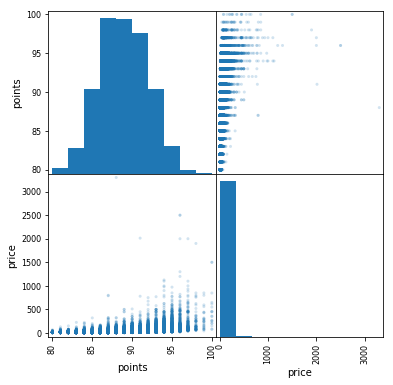

In [8]:
#scatter_matrix(wine[['points', 'price']], alpha=0.2, figsize=(6, 6))#, diagonal='kde')

In [11]:
wine.describe(include ='all', ).T #the .T transposes the data. makes more sense. 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,129971,NaN,NaN,NaN,64985,37519.5,0,32492.5,64985,97477.5,129970
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Gravenstein apple, honeysuckle and jasmine aro...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Grouping per country and points to analyse the mean price of the wines

In [41]:
cnt = (wine.groupby(
    ['country','points'])['price'].agg(['count','min','max','mean']
                                      ).sort_values(by = 'mean',ascending = False)[:10]
)

#in this line, she's grouping by the country and points. then using the price column to do summary stats on. 

cnt.reset_index(inplace=True) #not sure what reset_index is  doing
cnt.style.background_gradient(cmap='Accent')#, high=0.5) #cmap= matplotlib colormap. PuBu, 
#not sure what the high is doing, says it is compress the range by these values.
#https://matplotlib.org/examples/color/colormaps_reference.html

#not sure why this calls a table, she just called the style. maybe groupby objects are inherently tables?

,country,points,count,min,max,mean
0,Germany,98,1,775,775,775
1,France,100,8,150,1500,685.375
2,Australia,99,2,300,850,575
3,Portugal,100,2,450,650,550
4,France,99,3,159,800,506.333
5,Germany,97,7,245,775,464.714
6,Spain,98,1,450,450,450
7,France,98,14,70,1900,449.429
8,Italy,100,4,210,550,372.5
9,France,97,50,45,2000,363.38


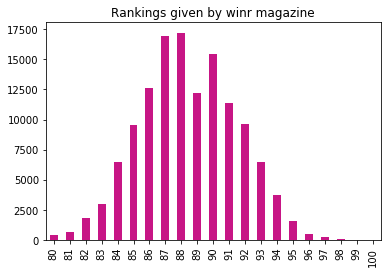

In [42]:
(wine['points']
 .value_counts()
 .sort_index()
 .plot.bar(color = 'mediumvioletred',title = 'Rankings given by winr magazine'));

#can send a value_counts() right into a .plot.bar  
#super useful!

In [8]:
# %load prescription_update_and_druglist.py
#!/usr/bin/env python


"""
Module containing functions to subset the raw data:
keeps description, country, price, points and adds
column for price in GBP

"""

import sys
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.externals.joblib import Memory
memory = Memory(cachedir='/tmp', verbose=0)
#@memory.cache above any def fxn.


#not shown: imported antibiotic annotations into prescription table using code provided by
#Dr. Luo's postdoc, which pings API


#implicit before hand:
#prescriptions = pd.read_csv('/Users/geickelb1/Desktop/PhD_Misc/HSIP_442_Yuan_Lao/project/Newprescription.csv', index_col=0, dtype=dtype)




@memory.cache
def prescription_update_fxn(prescription_df):
    """
    take the prescription table w/ antibiotics generated from NDC->ATC conversion and update it to fix some antibiotics that were coded as false for some NDC codes but true for others. 
    Args:
    -----
    prescription_df: prescription table generated previously with anootated antiboitic column
        can use: pd.read_csv('/Users/geickelb1/Desktop/PhD_Misc/HSIP_442_Yuan_Lao/project/Newprescription.csv', index_col=0, dtype=dtype)

    Returns:
    -----
    ABrx2: df
        updated dataframe
    """
    #updating prescription table to include rows not initially captured by atc conversion
    prescriptions= prescription_df
    prescriptions_updated = list(prescriptions.loc[prescriptions.loc[:,"Antibiotics"]==True,'drug'].unique())
    
    #some prescriptions have multiple ndc codes, putting all "true" antibiotics with any true NDC code in a list
    true_ndc= prescriptions.loc[prescriptions.loc[:,"drug"].isin(prescriptions_updated),'ndc'].unique() 

    ABrx2= prescriptions.loc[prescriptions.loc[:,"ndc"].isin(true_ndc),:]
   
    #removing known problematic drugs
    drugs_that_dont_belong =['Furosemide','Dextrose 50%','Vancomycin Oral Liquid',
                         'Erythromycin 0.5% Ophth Oint','NEO*IV*Furosemide',
                         'Nystatin','Orthopedic Solution','Neomycin-Polymyxin-Bacitracin Ophth. Oint',
                         'Bacitracin Ophthalmic Oint','Bacitracin Ointment','Lasix',
                         'dextrose','MetronidAZOLE Topical 1 % Gel','Enalaprilat',
                         'NEO*PO*Furosemide (10mg/1ml)','Metronidazole Gel 0.75%-Vaginal','Spironolactone',
                         'Heparin',
                        'voriconazole','valgancyclovir','chloroquine','tamiflu','mefloquine','foscarnet',
                         'fluconazole','vorconazole','quinine','ribavirin','gancyclovir','chloroquine',
                         'atovaquone','ambisome', 'acyclovir', 'Acyclovir']

    drugs_that_dont_belong=[w.lower() for w in drugs_that_dont_belong]


    
    ABrx2= ABrx2.loc[~ABrx2.loc[:,"drug"].str.lower().isin(drugs_that_dont_belong),:] #tilde transforms isin to notin()

    # Constructing the fname
    today = datetime.datetime.today().strftime('%Y-%m-%d')
    fname = f'data/interim/{today}-Prescription_updated.csv' #not sure why they add the f before. 

    # Saving the csv
    ABrx2.to_csv(fname, index = False)
    
    return(ABrx2)

if __name__ == '__main__':
    filename = sys.argv[1]
    print(filename)
    print(prescription_update_fxn(filename))   #what does this do?



In [ ]:
######SUPER USEFUL#####

wine['country'].nunique() ###can get number of unique without doing len(df.unique())

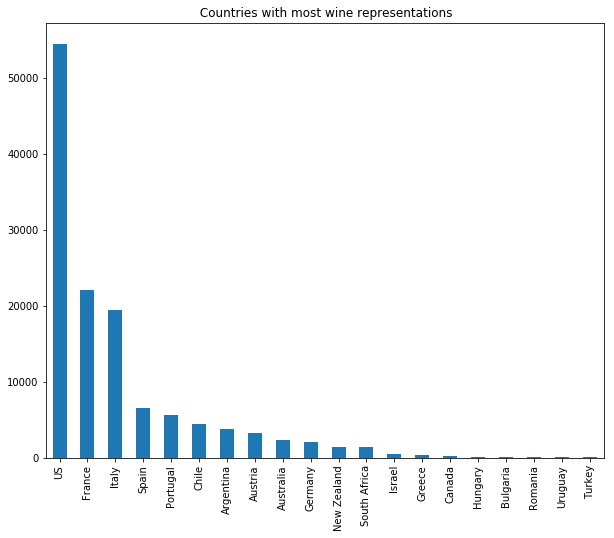

In [102]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10, 8)) #make a subplot to impose pic onto
country = wine['country'].value_counts().to_frame()[0:20]
country.plot.bar(ax = ax, legend = None, title = ' Countries with most wine representations');



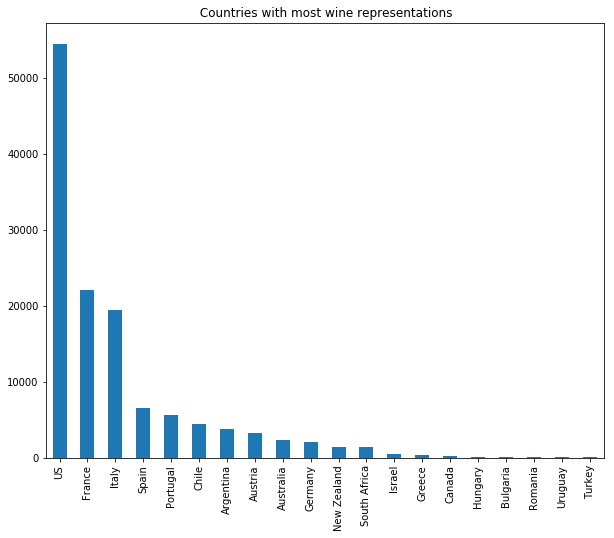

In [54]:
####useful

#wine['country'].value_counts().to_frame()[0:20] #the .to_frame() changes the text and makes it look cleaner, not sure what it does.
%matplotlib inline
fig, ax = plt.subplots(figsize = (10, 8))
(wine['country'].value_counts()[0:20]).plot.bar(ax = ax, legend = None, title = ' Countries with most wine representations');

(wine['country'].value_counts().to_frame()[0:20][0:20]).plot.bar(ax = ax, legend = None, title = ' Countries with most wine representations');

#in this case adding the .to_frame() made all entres the same color, which is nice sometimes. 


In [57]:
#Which countries have the highest point mean?
country_grouped = wine.groupby('country')
grouped_list = country_grouped['points'].mean().reset_index()

#also can be rewritten as:
#wine.groupby('country')['points'].mean().reset_index()  #reset_index adds the old index (row name) as a column.

grouped_list.sort_values(by ='points', ascending = False).iloc[:20].reset_index(drop = True)


,country,points
0,England,91.581081
1,India,90.222222
2,Austria,90.101345
3,Germany,89.851732
4,Canada,89.369650
5,Hungary,89.191781
6,China,89.000000
7,France,88.845109
8,Luxembourg,88.666667
9,Australia,88.580507


## Getting only the wines produced by Chile

In [58]:
#copying, can be useful

chile = wine[wine['country'] == 'Chile'].copy() #.copy() Make a copy of this object’s indices and data. not sure why to add..
chile.head()

#Updates to the data shared by shallow copy and original is reflected in both; deep copy remains unchanged.

#ie if you make a shallow copy of somthing, it is dependent on the origional and will be changed prospectively if the origional is changed.
#however if you only change the shallow the origional isn't changed. 

#when copying an object containing Python objects, a deep copy will copy the data, but will not do so recursively. 
#Updating a nested data object will be reflected in the deep copy.

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
36,36,Chile,"White flower, lychee and apple aromas carry th...",Estate,86,15.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Estampa 2011 Estate Viognier-Chardonnay (Colch...,Viognier-Chardonnay,Estampa
44,44,Chile,A berry aroma comes with cola and herb notes. ...,NaN,86,9.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Sundance 2011 Merlot (Maule Valley),Merlot,Sundance
51,51,Chile,This is much different than Casa Silva's 2009 ...,Gran Reserva,85,22.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Casa Silva 2008 Gran Reserva Petit Verdot (Col...,Petit Verdot,Casa Silva
58,58,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,13.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
80,80,Chile,Caramelized oak and vanilla aromas are front a...,Special Release Reserva,86,12.0,Rapel Valley,NaN,NaN,Michael Schachner,@wineschach,Aresti 2014 Special Release Reserva Carmenère ...,Carmenère,Aresti


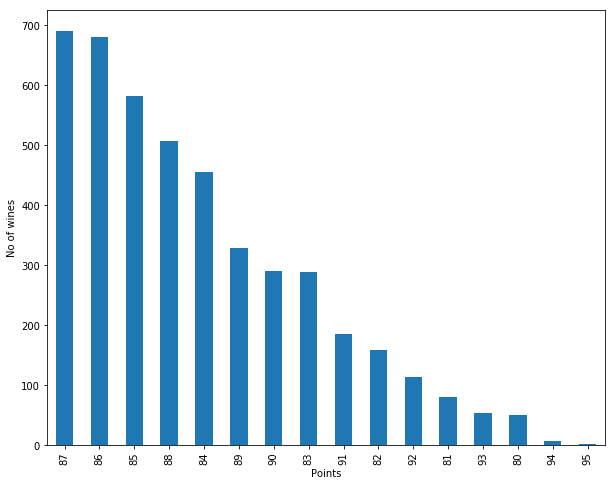

In [61]:
fig, ax = plt.subplots(figsize = (10, 8))
chile_points = chile['points'].value_counts().to_frame() #again using valuecounts in summary plots
chile_points.sort_values(by = 'points', ascending = False, inplace = True)
chile_points.plot.bar(ax = ax, legend = None)
ax.set_xlabel('Points')
ax.set_ylabel('No of wines');

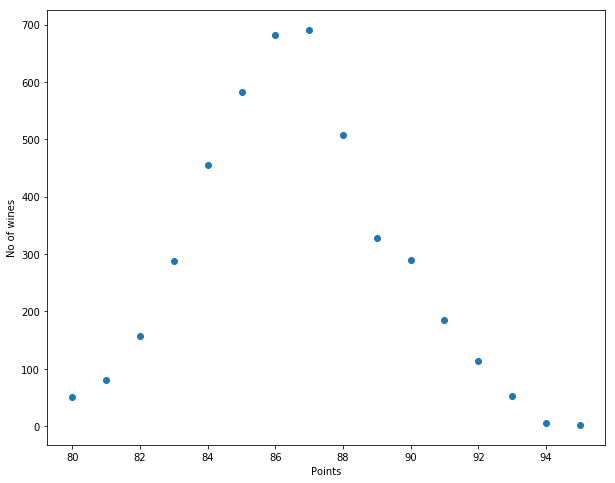

In [85]:
#adjusting graph for scatter

fig, ax = plt.subplots(figsize = (10, 8))
chile_points = chile['points'].value_counts().to_frame().reset_index() #the reset index lets me do the scatter
chile_points.sort_values(by = 'points', ascending = False, inplace = True)
#chile_points.plot.scatter(x= ax = ax, legend = None)
ax.plot(chile_points['index'], chile_points['points'], 'o')
ax.set_xlabel('Points')
ax.set_ylabel('No of wines');


# the real meat of the talk starts here

need to save all subsetting of cohort data into .py files and put into the src folder. 

In [ ]:
#step one is to make all of my cells wrapped in functions saved in .py folders.

#step two is to make an __init__ file, 
#which allows us to use functions from other scripts. tells python we have a package that has functions we wanna call.

in Documents/Github/Reproducible-python:
shell command:
$ touch src/data/__init__.py
$ touch src/__init__.py
#creates an init file. 

#creating a runall script:
#all paths will be related to the top level of my project.
#since our modules start with digits, we can't import as we would normaly:

from mypackage import myAwesomeModlue  (the normal way)


In [ ]:
###IMPORTANT

#also need to go to the src/__init__.py and add:
from . import data
from . import visualization

In [121]:
#instead we add a run-all.py file in the src folder looking like:
import importlib

subset = importlib.import_module('.data.01_subset-data-GBP', 'src')
#...

#now that i have my skeleton and modles imported, how do i go from step #1 (subset data), to step #3 (subset country)
#that I only need to run from my commandline.

#need to add:
if __name__ == '__main__': #ie if pythin is running this module as the source file (ie if it's called directly)
    # create the subset of the initial dataframe
    subset_file = subset.process_data_GBP(raw_data)  #inorder to call the functions we need to put the names defined above . before them. 
    # prints out the name of the new file created
    print(subset_file)
    # generate the plots
    plotwines.create_plots(subset_file)
    # subset the data for the country given 
    country_file = country_sub.get_country(subset_file, country)
    print(country_file)


ModuleNotFoundError: No module named 'src'

In [ ]:
#now i might be able to run this from the shell like:
$
python -m scripts.runall-wine-analysis

In [ ]:
#now add qc measures. 